In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.colors as cs
from sklearn import preprocessing
import time
from tqdm import tqdm

from sklearn.decomposition import PCA

from tslearn.generators import random_walks
from tslearn.clustering import KShape,TimeSeriesScalerMeanVariance


import seaborn as sns
from numpy.random import randn
import matplotlib as mpl
from scipy import stats


from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


In [2]:
# pre-process parameter weight dump:
# get absolute value of : (current_weight - previous_weight) / previous_weight 
def preprocessing_weights(file_path):
    weight = pd.read_csv(file_path,header = None)
    for i in range(1,weight.shape[0]):
        weight.loc[i-1,] = ((weight.loc[i,] - weight.loc[i-1,])/weight.loc[i,]).abs()
        if(i % 500 == 0): 
            print("processing at line: ",i)
    weight.drop([weight.shape[0]-1],inplace =True)
    newfile = file_path.split('.csv')[0] + "_weighted" + ".csv"
    
    weight.to_csv(newfile)
    return

In [3]:
def longest_interval(array):
    # get all break indexes
    
    start = array[0]
    end = array[-1]
        
    break_index = []
    for i in range(1,len(array)):
        if(array[i] != array[i-1] + 1):
            break_index.append(i-1)
            
    # no break 
    if(len(break_index) == 0): 
        return start,end
    # only one break
    elif len(break_index) == 1: 
        b = break_index[0]
        if(b > len(array) - 1 - (b+1)):
            start = array[0]
            end = array[b]
        else:
            start = array[b+1]
            end = array[-1]
    # more than one breaks
    else: 
        start = array[0]
        end = array[break_index[0]]
        longest = break_index[0] + 1
        for i in range(1,len(break_index)):
            if(break_index[i] - break_index[i-1] > longest):
                start = array[break_index[i-1] + 1]
                end = array[break_index[i]]
                longest = break_index[i] - break_index[i-1]
        if(longest < array[-1] - break_index[-1]):
            start = array[break_index[-1]+1]
            end = array[-1]
        
    return start,end


In [4]:
def getConvergeStartByKDE(params):
    conv_intervals = []
    start_conv = []
    end_conv = []
    count = 0
    for param_i in tqdm(params):
        count += 1
        param_i_ones = np.where(param_i==1)[0]
        param_i_ones = param_i_ones.reshape(-1,1)
        if(len(param_i_ones) < 1):
#             print("no peek !!!")
            conv_intervals.append((-1000,-1000))
            start_conv.append(-1000)
            end_conv.append(-1000)
        else:
            kde = KernelDensity(kernel='tophat',bandwidth = 300)
            kde.fit(param_i_ones)
            x_d = np.linspace(0, 5000, 5000)
            logprob = kde.score_samples(x_d[:,None])

            prob_arr = np.array(np.exp(logprob))
            rect_start,rect_end = longest_interval(np.where(prob_arr>0)[0])
#             print(count,"/",len(params)," from: ",rect_start," to: ", rect_end)
            conv_intervals.append((rect_start,rect_end))
            start_conv.append(rect_start)
            end_conv.append(rect_end)
    return conv_intervals,start_conv,end_conv      

# plotting related code 
#             plt.fill_between(x_d,np.exp(logprob),alpha = 0.5)
#             plt.plot(param_i_ones,np.full_like(param_i_ones,-0.01),'|k',markeredgewidth = 1)

#             rect_width= rect_end - rect_start
#             x1 = range(0,param_i.shape[0])
#             y1 = param_i
#             rect = patches.Rectangle((rect_start,0),rect_width,1,linewidth=0.6,edgecolor='r',facecolor='None')
#             fig = plt.figure()
#             ax = fig.add_subplot(111)
#             plt.plot(x1,y1,lw=0.6,alpha=0.5)
#             ax.add_patch(rect)
#             plt.show()


In [5]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value in lst2] 
    return lst3 

In [ ]:
wei_1 = pd.read_csv("cifar10_vgg_trail1/weights/1_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_1_tran =  wei_1.transpose().clip(upper=upper_bound)
wei_1_clip = wei_1_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_1 = min_max_scaler.fit_transform(wei_1_clip)

In [17]:
tmp1 = getConvergeStartByKDE(scaled_1)


100%|██████████| 64/64 [00:00<00:00, 89.31it/s]


In [12]:
preprocessing_weights('cifar10_vgg_trail2/weights/1.csv')

processing at line:  500
processing at line:  1000
processing at line:  1500
processing at line:  2000
processing at line:  2500
processing at line:  3000
processing at line:  3500
processing at line:  4000
processing at line:  4500


In [18]:
wei_2_1 = pd.read_csv("cifar10_vgg_trail2/weights/1_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_2_1_tran =  wei_2_1.transpose().clip(upper=upper_bound)
wei_2_1_clip = wei_2_1_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_2_1 = min_max_scaler.fit_transform(wei_2_1_clip)

In [19]:
tmp2 = getConvergeStartByKDE(scaled_2_1)

100%|██████████| 64/64 [00:00<00:00, 85.33it/s] 


In [26]:
tmp_li = []
for i in range(0,len(tmp)):
    if(tmp[i][0] == 0):
        tmp_li.append(i)

In [27]:
tmp_li_2 = []
for i in range(0,len(tmp2)):
    if(tmp2[i][0] == 0):
        tmp_li_2.append(i)

In [31]:
inter = intersection(tmp_li,tmp_li_2)

In [35]:
print(len(inter))
print(len(tmp_li))
print(len(tmp_li_2))


13
29
31


In [8]:
preprocessing_weights('cifar10_vgg_trail2/weights/7.csv')

processing at line:  500
processing at line:  1000
processing at line:  1500
processing at line:  2000
processing at line:  2500
processing at line:  3000
processing at line:  3500
processing at line:  4000
processing at line:  4500


In [31]:
wei_7 = pd.read_csv("cifar10_vgg_trail1/weights/7_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_7_tran =  wei_7.transpose().clip(upper=upper_bound)
wei_7_clip = wei_7_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_7 = min_max_scaler.fit_transform(wei_7_clip)

kde_7,start_conv_l7,end_conv_l7 = getConvergeStartByKDE(scaled_7)


100%|██████████| 128/128 [00:00<00:00, 210.63it/s]


In [32]:
wei_2_7 = pd.read_csv("cifar10_vgg_trail2/weights/7_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_2_7_tran =  wei_2_7.transpose().clip(upper=upper_bound)
wei_2_7_clip = wei_2_7_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_2_7 = min_max_scaler.fit_transform(wei_2_7_clip)
kde_2_7,start_conv_2_l7,end_conv_2_l7 = getConvergeStartByKDE(scaled_2_7)

100%|██████████| 128/128 [00:00<00:00, 208.03it/s]


In [10]:
# tmp_li = []
# for i in range(0,len(kde_7)):
#     if(kde_7[i][0] == 0):
#         tmp_li.append(i)
# tmp_li_2 = []
# for i in range(0,len(kde_2_7)):
#     if(kde_2_7[i][0] == 0):
#         tmp_li_2.append(i)
# inter = intersection(tmp_li,tmp_li_2)
# print(len(inter))
# print(len(tmp_li))
# print(len(tmp_li_2))


## visualize difference in layer 7

/userhome/34/gyu/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


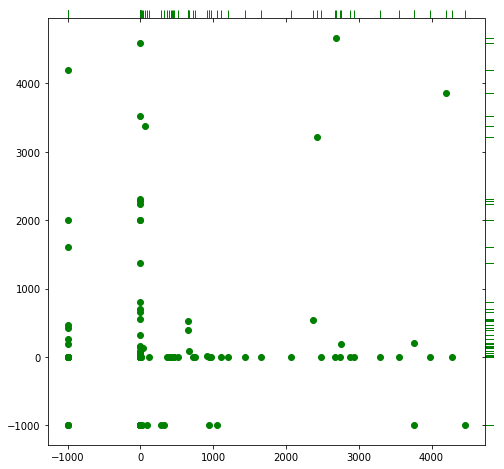

In [34]:
grid = sns.JointGrid(start_conv_l7, start_conv_2_l7, space=0, height=8, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

## visualize difference in layer 4 and 5

In [38]:
preprocessing_weights('cifar10_vgg_trail2/weights/5.csv')

processing at line:  500
processing at line:  1000
processing at line:  1500
processing at line:  2000
processing at line:  2500
processing at line:  3000
processing at line:  3500
processing at line:  4000
processing at line:  4500


In [39]:
wei_5 = pd.read_csv("cifar10_vgg_trail1/weights/5_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_5_tran =  wei_5.transpose().clip(upper=upper_bound)
wei_5_clip = wei_5_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_5 = min_max_scaler.fit_transform(wei_5_clip)

kde_5,start_conv_l5,end_conv_l5 = getConvergeStartByKDE(scaled_5)


100%|██████████| 128/128 [00:00<00:00, 134.79it/s]


In [40]:
wei_2_5 = pd.read_csv("cifar10_vgg_trail2/weights/5_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_2_5_tran =  wei_2_5.transpose().clip(upper=upper_bound)
wei_2_5_clip = wei_2_5_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_2_5 = min_max_scaler.fit_transform(wei_2_5_clip)
kde_2_5,start_conv_2_l5,end_conv_2_l5 = getConvergeStartByKDE(scaled_2_5)

100%|██████████| 128/128 [00:00<00:00, 193.45it/s]


/userhome/34/gyu/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


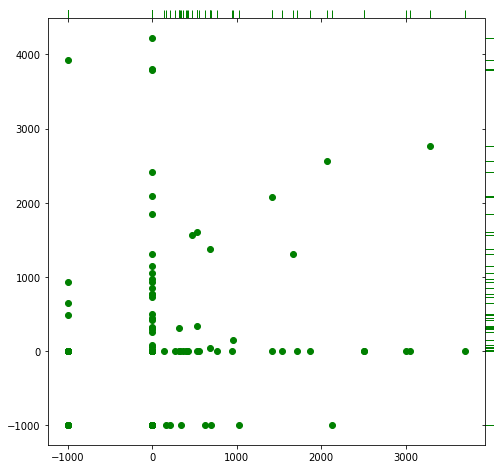

In [41]:
grid = sns.JointGrid(start_conv_l5, start_conv_2_l5, space=0, height=8, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

In [42]:
preprocessing_weights('cifar10_vgg_trail2/weights/4.csv')

processing at line:  500
processing at line:  1000
processing at line:  1500
processing at line:  2000
processing at line:  2500
processing at line:  3000
processing at line:  3500
processing at line:  4000
processing at line:  4500


In [8]:
wei_4 = pd.read_csv("cifar10_vgg_trail1/weights/4_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_4_tran =  wei_4.transpose().clip(upper=upper_bound)
wei_4_clip = wei_4_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_4 = min_max_scaler.fit_transform(wei_4_clip)

kde_4,start_conv_l4,end_conv_l4 = getConvergeStartByKDE(scaled_4)
np.save("cifar10_vgg_trail1/weights/4_start_conv",start_conv_l4)

100%|██████████| 73728/73728 [01:21<00:00, 901.98it/s] 


In [6]:
wei_2_4 = pd.read_csv("cifar10_vgg_trail2/weights/4_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_2_4_tran =  wei_2_4.transpose().clip(upper=upper_bound)
wei_2_4_clip = wei_2_4_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_2_4 = min_max_scaler.fit_transform(wei_2_4_clip)
kde_2_4,start_conv_2_l4,end_conv_2_l4 = getConvergeStartByKDE(scaled_2_4)
np.save("cifar10_vgg_trail2/weights/4_start_conv",start_conv_2_l4)

100%|██████████| 73728/73728 [01:22<00:00, 893.46it/s] 


/userhome/34/gyu/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


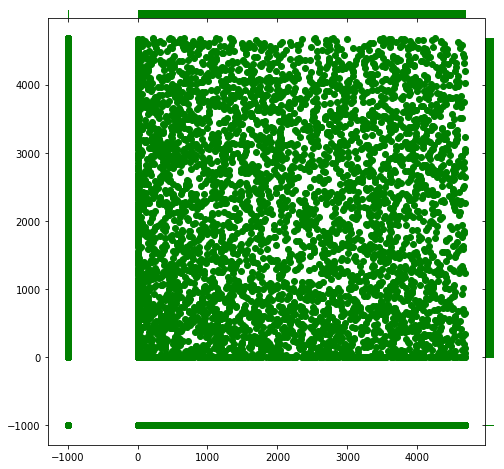

In [15]:
start_conv_l4 = np.load("cifar10_vgg_trail1/weights/4_start_conv.npy")
grid = sns.JointGrid(start_conv_l4, start_conv_2_l4, space=0, height=8, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

In [21]:
interse = intersection(start_conv_l4,start_conv_2_l4)

In [31]:
unique,counts = np.unique(interse,return_counts = True)
dict(zip(unique,counts))

{-1000: 54654,
 0: 1520,
 1: 7,
 2: 6,
 3: 5,
 4: 3,
 5: 4,
 6: 6,
 7: 6,
 9: 2,
 10: 2,
 11: 4,
 12: 6,
 13: 6,
 14: 4,
 15: 5,
 16: 4,
 17: 4,
 18: 7,
 19: 4,
 20: 6,
 21: 13,
 22: 5,
 23: 4,
 24: 10,
 25: 9,
 26: 4,
 27: 4,
 28: 4,
 29: 7,
 30: 1,
 31: 9,
 32: 4,
 33: 6,
 34: 8,
 35: 3,
 36: 1,
 37: 8,
 38: 10,
 39: 11,
 40: 3,
 41: 5,
 42: 7,
 43: 5,
 44: 5,
 45: 6,
 46: 5,
 47: 5,
 48: 4,
 49: 3,
 50: 7,
 51: 7,
 52: 7,
 53: 1,
 54: 7,
 55: 6,
 56: 3,
 57: 4,
 58: 4,
 59: 10,
 60: 5,
 61: 5,
 62: 2,
 63: 4,
 64: 9,
 65: 6,
 66: 5,
 67: 5,
 68: 5,
 69: 6,
 70: 1,
 71: 8,
 72: 9,
 73: 10,
 74: 3,
 75: 1,
 76: 4,
 77: 3,
 78: 5,
 79: 3,
 80: 6,
 81: 12,
 82: 5,
 83: 4,
 84: 5,
 85: 5,
 87: 2,
 88: 3,
 89: 6,
 90: 11,
 91: 2,
 92: 4,
 93: 9,
 94: 7,
 95: 9,
 96: 6,
 97: 1,
 98: 5,
 99: 8,
 100: 15,
 101: 5,
 102: 5,
 103: 7,
 104: 5,
 105: 5,
 106: 4,
 107: 5,
 108: 8,
 110: 5,
 111: 3,
 112: 5,
 113: 8,
 114: 1,
 115: 3,
 116: 4,
 117: 6,
 118: 6,
 119: 7,
 120: 1,
 121: 5,
 122: 5,


54654 / 73728 是不收敛的

### Try above methods on the same-init case

In [37]:
preprocessing_weights('/userhome/34/gyu/Dissertation/same_init_weis_trail1/7.csv')
preprocessing_weights('/userhome/34/gyu/Dissertation/same_init_weis_trail2/7.csv')


processing at line:  500
processing at line:  1000
processing at line:  1500
processing at line:  2000
processing at line:  2500
processing at line:  3000
processing at line:  3500
processing at line:  4000
processing at line:  4500
processing at line:  500
processing at line:  1000
processing at line:  1500
processing at line:  2000
processing at line:  2500
processing at line:  3000
processing at line:  3500
processing at line:  4000
processing at line:  4500


In [26]:
wei_5 = pd.read_csv("same_init_weis_trail1/5_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_5_tran =  wei_5.transpose().clip(upper=upper_bound)
wei_5_clip = wei_5_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_5 = min_max_scaler.fit_transform(wei_5_clip)

kde_5,start_conv_l5,end_conv_l5 = getConvergeStartByKDE(scaled_5)



100%|██████████| 128/128 [00:00<00:00, 217.29it/s]


In [27]:
wei_2_5 = pd.read_csv("same_init_weis_trail2/5_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_2_5_tran =  wei_2_5.transpose().clip(upper=upper_bound)
wei_2_5_clip = wei_2_5_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_2_5 = min_max_scaler.fit_transform(wei_2_5_clip)
kde_2_5,start_conv_2_l5,end_conv_2_l5 = getConvergeStartByKDE(scaled_2_5)

100%|██████████| 128/128 [00:00<00:00, 222.43it/s]


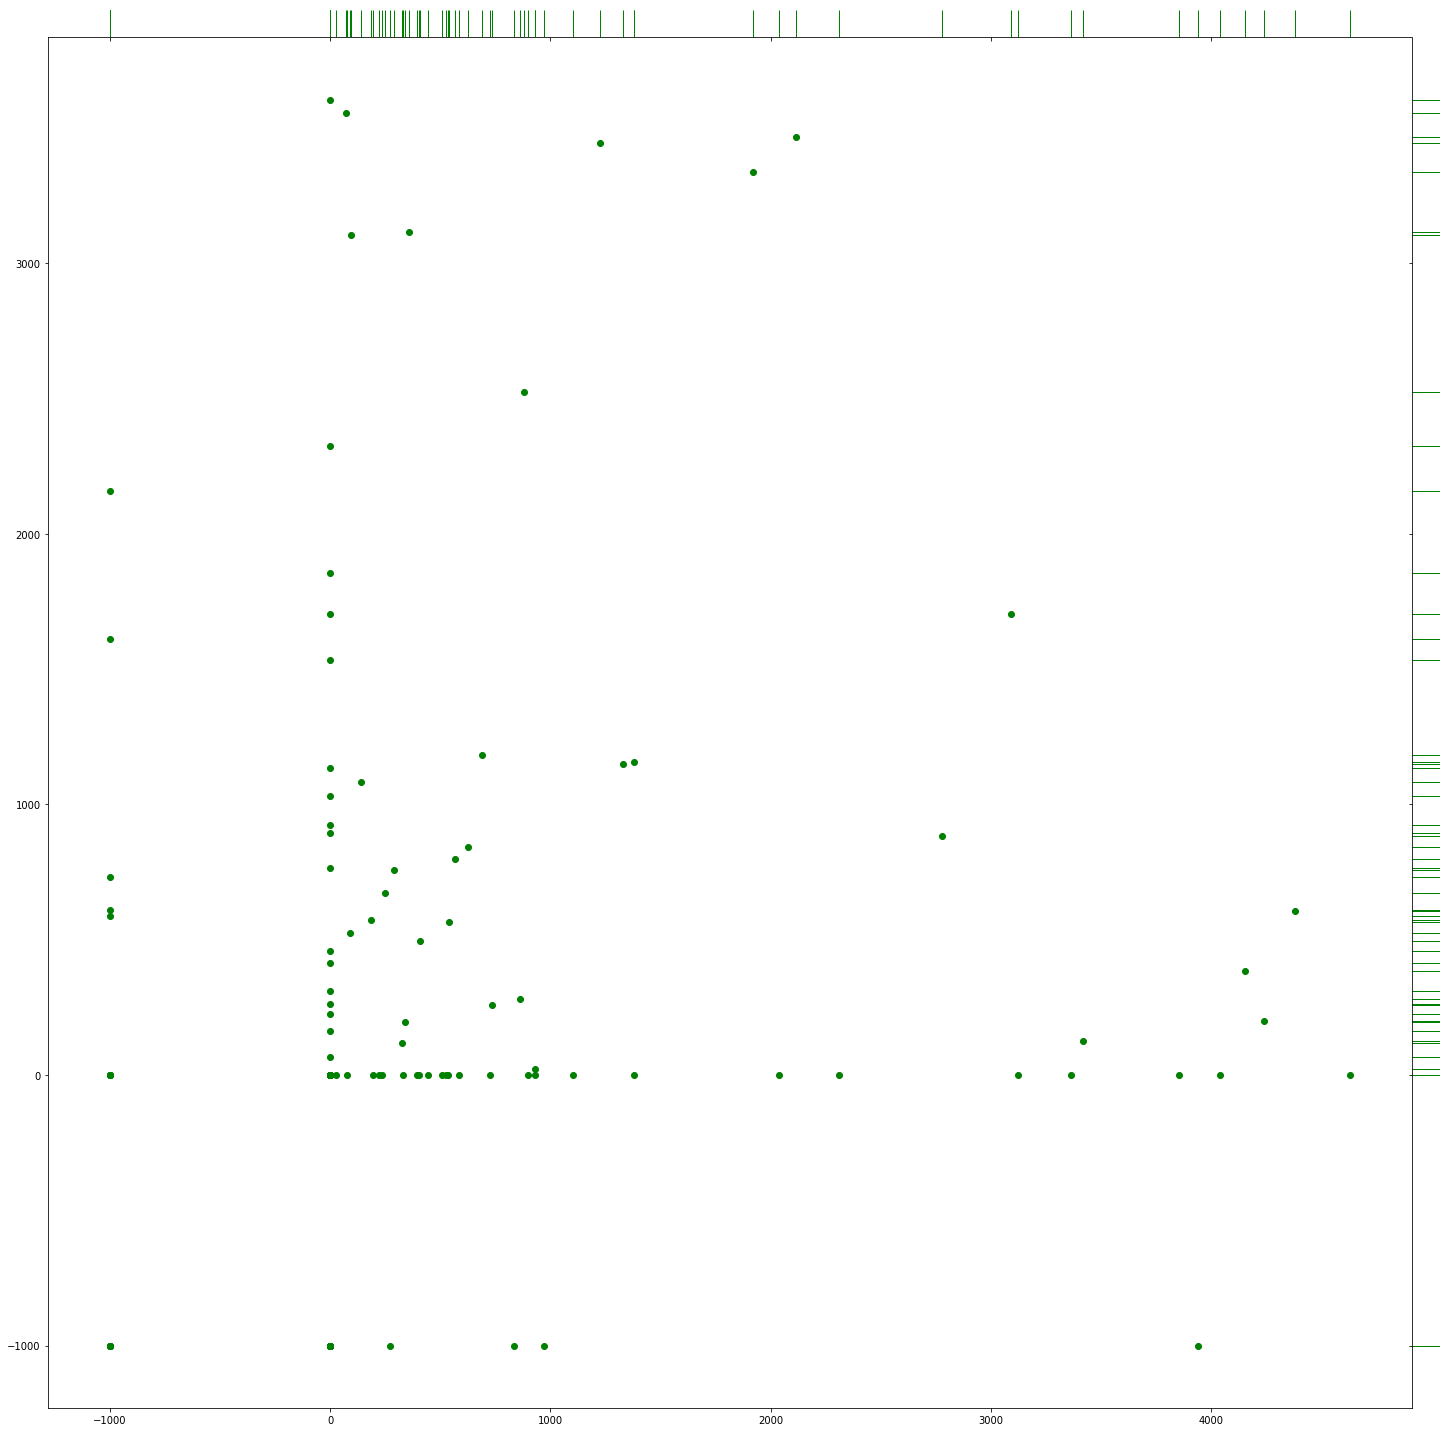

In [38]:
grid = sns.JointGrid(start_conv_l5, start_conv_2_l5, space=0, height=20,ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")

In [ ]:
preprocessing_weights('/userhome/34/gyu/Dissertation/same_init_weis_trail1/4.csv')
preprocessing_weights('/userhome/34/gyu/Dissertation/same_init_weis_trail2/4.csv')


processing at line:  500
processing at line:  1000
processing at line:  1500
processing at line:  2000
processing at line:  2500
processing at line:  3000
processing at line:  3500
processing at line:  4000
processing at line:  4500
processing at line:  500
processing at line:  1000
processing at line:  1500
processing at line:  2000
processing at line:  2500
processing at line:  3000
processing at line:  3500
processing at line:  4000
processing at line:  4500


In [13]:
wei_4 = pd.read_csv("same_init_weis_trail1/4_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_4_tran =  wei_4.transpose().clip(upper=upper_bound)
wei_4_clip = wei_4_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_4 = min_max_scaler.fit_transform(wei_4_clip)

kde_4,start_conv_l4,end_conv_l4 = getConvergeStartByKDE(scaled_4)
np.save("same_init_weis_trail1/4_start_conv",start_conv_l4)

100%|██████████| 73728/73728 [01:10<00:00, 1042.21it/s]


In [7]:
wei_2_4 = pd.read_csv("same_init_weis_trail2/4_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_2_4_tran =  wei_2_4.transpose().clip(upper=upper_bound)
wei_2_4_clip = wei_2_4_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_2_4 = min_max_scaler.fit_transform(wei_2_4_clip)
kde_2_4,start_conv_2_l4,end_conv_2_l4 = getConvergeStartByKDE(scaled_2_4)
np.save("same_init_weis_trail2/4_start_conv",start_conv_2_l4)

/userhome/34/gyu/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


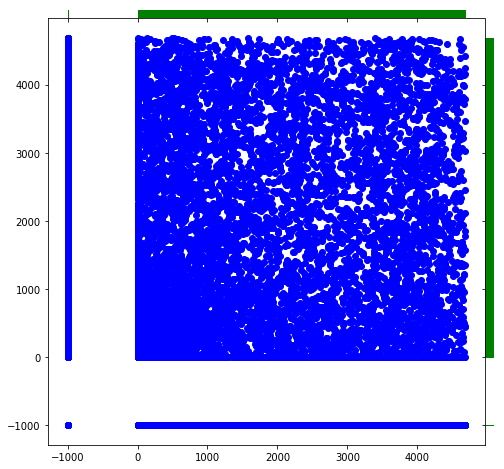

In [36]:
start_conv_l4 = np.load("same_init_weis_trail1/4_start_conv.npy")
start_conv_2_l4 = np.load("same_init_weis_trail2/4_start_conv.npy")

grid = sns.JointGrid(start_conv_l4, start_conv_2_l4, space=0, height=8,ratio = 50)
grid.plot_joint(plt.scatter, color="b")
grid.plot_marginals(sns.rugplot, height=1, color="g")

In [39]:
wei_7 = pd.read_csv("same_init_weis_trail1/7_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_7_tran =  wei_7.transpose().clip(upper=upper_bound)
wei_7_clip = wei_7_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_7 = min_max_scaler.fit_transform(wei_7_clip)

kde_7,start_conv_l7,end_conv_l7 = getConvergeStartByKDE(scaled_7)

wei_2_7 = pd.read_csv("same_init_weis_trail2/7_weighted.csv").drop('Unnamed: 0',axis=1)
upper_bound = 10
wei_2_7_tran =  wei_2_7.transpose().clip(upper=upper_bound)
wei_2_7_clip = wei_2_7_tran.clip(lower=0.01).replace(0.01, 0)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_2_7 = min_max_scaler.fit_transform(wei_2_7_clip)
kde_2_7,start_conv_2_l7,end_conv_2_l7 = getConvergeStartByKDE(scaled_2_7)

100%|██████████| 128/128 [00:00<00:00, 211.92it/s]


/userhome/34/gyu/anaconda3/envs/tensorflow2/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


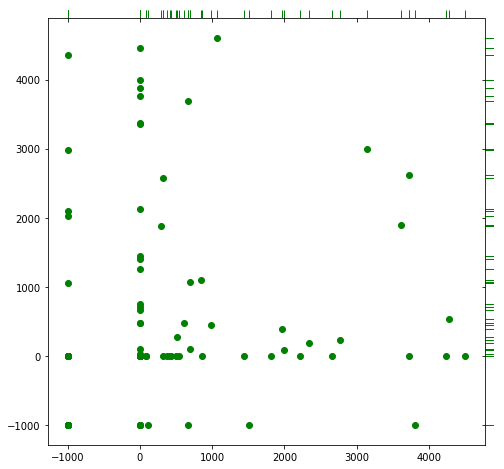

In [40]:
grid = sns.JointGrid(start_conv_l7, start_conv_2_l7, space=0, height=8, ratio=50)
grid.plot_joint(plt.scatter, color="g")
grid.plot_marginals(sns.rugplot, height=1, color="g")